<a href="https://colab.research.google.com/github/ntlcs/desafio_google_analytics_01cyclistic/blob/main/Google_Analytics_desafio_01_Cyclistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np
import gc
from google.colab import drive
import os
import matplotlib.pyplot as plt

In [ ]:
# Montar o Google Drive
drive.mount('/content/drive')

In [ ]:
# Verificar o conteúdo do diretório
diretorio = '/content/drive/My Drive/'
arquivos = os.listdir(diretorio)
print(arquivos)

In [26]:
# Lista com os caminhos dos arquivos originais
caminhos_arquivos = [
    '/content/drive/My Drive/202301-divvy-tripdata.csv',
    '/content/drive/My Drive/202302-divvy-tripdata.csv',
    '/content/drive/My Drive/202303-divvy-tripdata.csv',
    '/content/drive/My Drive/202304-divvy-tripdata.csv',
    '/content/drive/My Drive/202305-divvy-tripdata.csv',
    '/content/drive/My Drive/202306-divvy-tripdata.csv',
    '/content/drive/My Drive/202307-divvy-tripdata.csv',
    '/content/drive/My Drive/202308-divvy-tripdata.csv',
    '/content/drive/My Drive/202309-divvy-tripdata.csv',
    '/content/drive/My Drive/202310-divvy-tripdata.csv',
    '/content/drive/My Drive/202311-divvy-tripdata.csv',
    '/content/drive/My Drive/202312-divvy-tripdata.csv'
]



In [28]:
# Função para processar cada planilha
def processar_planilha(caminho_original):
    # Carregar a planilha
    df = pd.read_csv(caminho_original)

    # Remover linhas com valores nulos nas estações
    df.dropna(subset=['start_station_name', 'end_station_name'], inplace=True)

    # Remover duplicatas
    df.drop_duplicates(inplace=True)

    # Converter colunas de data/hora para datetime
    df['started_at'] = pd.to_datetime(df['started_at'])
    df['ended_at'] = pd.to_datetime(df['ended_at'])

    # Calcular a duração da viagem em minutos
    df['ride_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

    return df


In [29]:
# Lista para armazenar os DataFrames limpos
dfs_limpos = []

In [33]:
# Iterar sobre a lista de arquivos, processar cada um e armazenar no list
for caminho in caminhos_arquivos:
    try:
        df_limpo = processar_planilha(caminho)
        dfs_limpos.append(df_limpo)
    except FileNotFoundError:
        print(f"Arquivo não encontrado: {caminho}")
    except Exception as e:
        print(f"Ocorreu um erro ao processar {caminho}: {e}")
    finally:
        gc.collect()
        # Verificar se a lista de DataFrames está vazia antes de concatenar
if dfs_limpos:
    df_unido = pd.concat(dfs_limpos, ignore_index=True)

    # Caminho para salvar o DataFrame unido
    caminho_para_salvar_unido = '/content/drive/My Drive/planilha_unida_limpa.csv'

    # Salvar o DataFrame unido como um arquivo CSV
    df_unido.to_csv(caminho_para_salvar_unido, index=False)

    print(f"Arquivo unido limpo salvo em: {caminho_para_salvar_unido}")
else:
    print("Nenhum arquivo foi processado.")

Arquivo unido limpo salvo em: /content/drive/My Drive/planilha_unida_limpa.csv


In [46]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Carregar o DataFrame unido
caminho_para_carregar_unido = '/content/drive/My Drive/planilha_unida_limpa.csv'
df_unido = pd.read_csv(caminho_para_carregar_unido)

# Exibir as primeiras linhas do DataFrame para verificação
display(df_unido.head(2))

In [48]:
# Converter colunas de data/hora para datetime
df_unido['started_at'] = pd.to_datetime(df_unido['started_at'])
df_unido['ended_at'] = pd.to_datetime(df_unido['ended_at'])

Duração média das viagens por tipo de usuário:
member_casual
casual    22.937873
member    12.130615
Name: ride_duration, dtype: float64


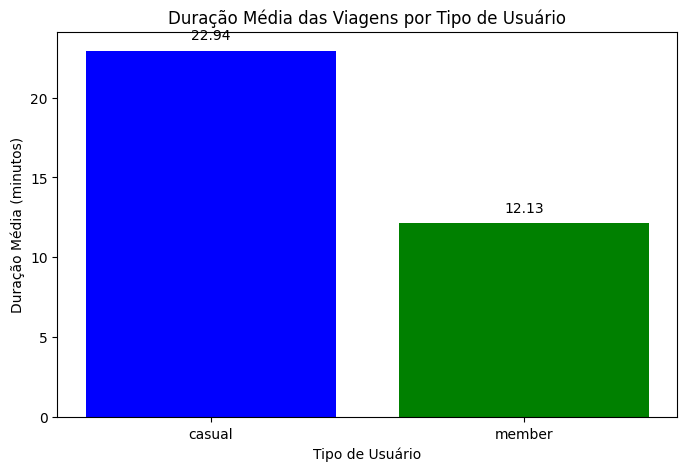

In [57]:
# Análise da duração média das viagens por tipo de usuário
duracao_media = df_unido.groupby('member_casual')['ride_duration'].mean()
print("Duração média das viagens por tipo de usuário:")
print(duracao_media)

# Plotar a duração média das viagens por tipo de usuário
plt.figure(figsize=(8, 5))
plt.bar(duracao_media.index, duracao_media.values, color=['blue', 'green'])
plt.title('Duração Média das Viagens por Tipo de Usuário')
plt.xlabel('Tipo de Usuário')
plt.ylabel('Duração Média (minutos)')
for i, v in enumerate(duracao_media.values):
    plt.text(i, v + 0.5, str(round(v, 2)), ha='center', va='bottom')
plt.show()

Quantidade de viagens por tipo de usuário:
member_casual
member    5600256
casual    3063882
Name: count, dtype: int64


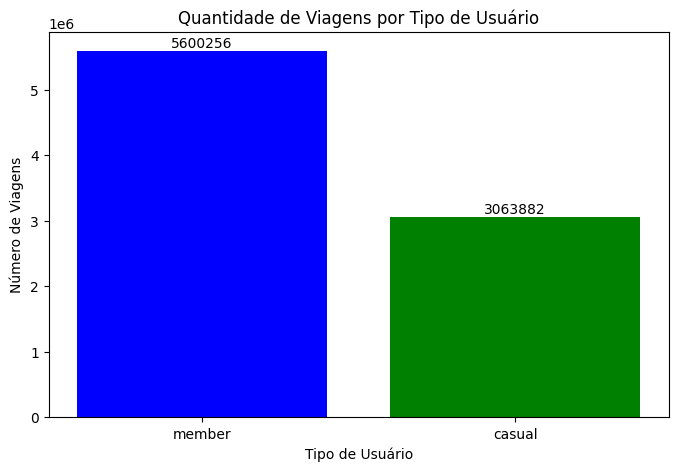

In [56]:
# Análise da quantidade de viagens por tipo de usuário
quantidade_viagens = df_unido['member_casual'].value_counts()
print("Quantidade de viagens por tipo de usuário:")
print(quantidade_viagens)

# Plotar a quantidade de viagens por tipo de usuário
plt.figure(figsize=(8, 5))
plt.bar(quantidade_viagens.index, quantidade_viagens.values, color=['blue', 'green'])
plt.title('Quantidade de Viagens por Tipo de Usuário')
plt.xlabel('Tipo de Usuário')
plt.ylabel('Número de Viagens')
for i, v in enumerate(quantidade_viagens.values):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')
plt.show()

In [51]:
# Análise dos horários de uso por tipo de usuário
df_unido['hora_inicio'] = df_unido['started_at'].dt.hour

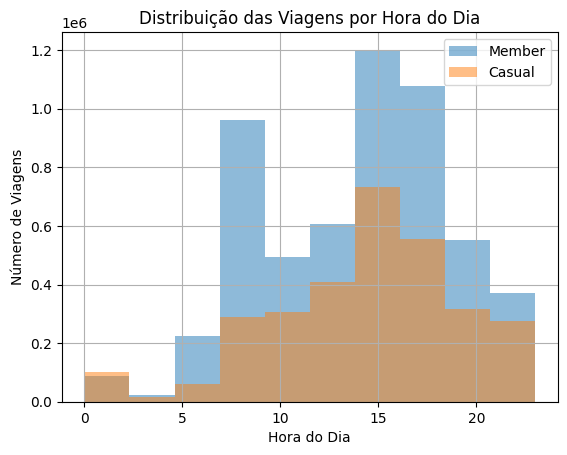

In [52]:
# Histograma de uso por hora para cada tipo de usuário
df_unido[df_unido['member_casual'] == 'member']['hora_inicio'].hist(alpha=0.5, label='Member')
df_unido[df_unido['member_casual'] == 'casual']['hora_inicio'].hist(alpha=0.5, label='Casual')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Viagens')
plt.title('Distribuição das Viagens por Hora do Dia')
plt.legend()
plt.show()

In [53]:
# Análise dos locais de início mais populares por tipo de usuário
locais_inicio_populares = df_unido.groupby(['member_casual', 'start_station_name']).size().reset_index(name='contagem')
locais_inicio_populares = locais_inicio_populares.sort_values(by=['member_casual', 'contagem'], ascending=[True, False])

In [54]:
print("Locais de início mais populares por tipo de usuário:")
print(locais_inicio_populares.head(10))  # Exibir os 10 mais populares para cada tipo de usuário

Locais de início mais populares por tipo de usuário:
     member_casual                  start_station_name  contagem
1348        casual             Streeter Dr & Grand Ave     86742
265         casual   DuSable Lake Shore Dr & Monroe St     57432
567         casual               Michigan Ave & Oak St     42202
573         casual                     Millennium Park     37764
266         casual  DuSable Lake Shore Dr & North Blvd     37550
1269        casual                      Shedd Aquarium     33906
1352        casual                 Theater on the Lake     30120
269         casual                      Dusable Harbor     29096
9           casual                   Adler Planetarium     22614
582         casual                     Montrose Harbor     21816


Locais de início mais populares para membros:
start_station_name
Clinton St & Washington Blvd    48642
Kingsbury St & Kinzie St        48428
Clark St & Elm St               46158
Wells St & Concord Ln           38442
Clinton St & Madison St         38230
Name: count, dtype: int64

Locais de início mais populares para casuais:
start_station_name
Streeter Dr & Grand Ave               86742
DuSable Lake Shore Dr & Monroe St     57432
Michigan Ave & Oak St                 42202
Millennium Park                       37764
DuSable Lake Shore Dr & North Blvd    37550
Name: count, dtype: int64


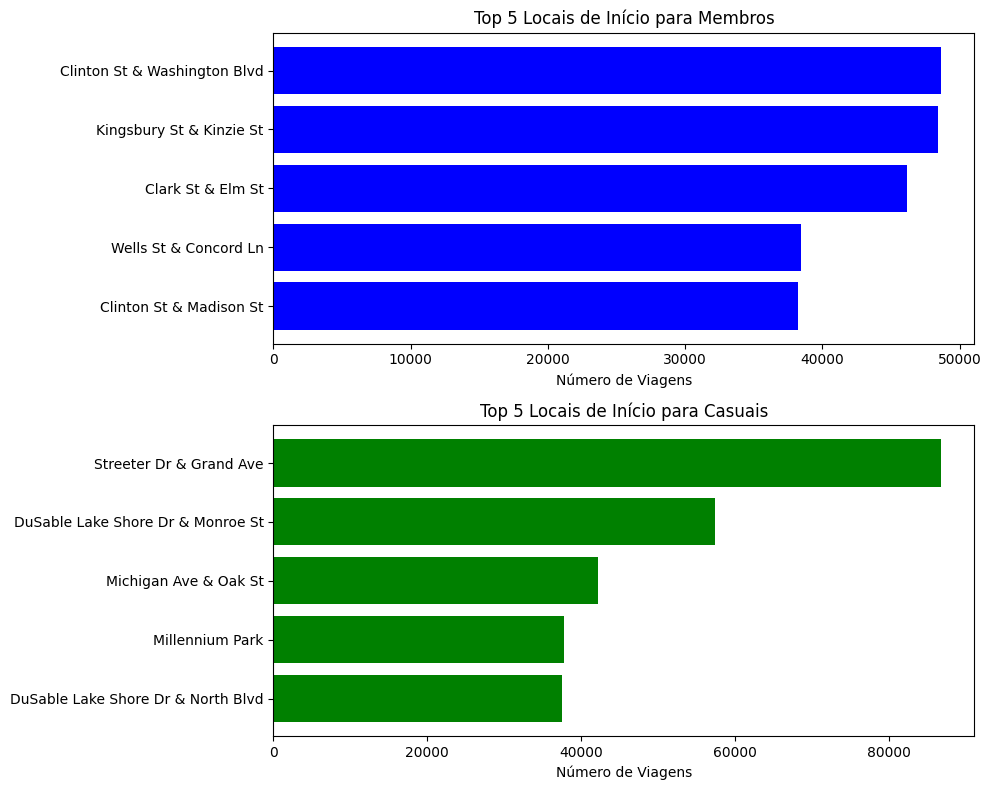

In [55]:
# Análise dos locais de início mais populares por tipo de usuário
locais_inicio_member = df_unido[df_unido['member_casual'] == 'member']['start_station_name'].value_counts().head(5)
locais_inicio_casual = df_unido[df_unido['member_casual'] == 'casual']['start_station_name'].value_counts().head(5)

print("Locais de início mais populares para membros:")
print(locais_inicio_member)

print("\nLocais de início mais populares para casuais:")
print(locais_inicio_casual)

# Visualizar os locais mais populares em um gráfico de barras
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

axs[0].barh(locais_inicio_member.index, locais_inicio_member.values, color='blue')
axs[0].set_title('Top 5 Locais de Início para Membros')
axs[0].set_xlabel('Número de Viagens')
axs[0].invert_yaxis()

axs[1].barh(locais_inicio_casual.index, locais_inicio_casual.values, color='green')
axs[1].set_title('Top 5 Locais de Início para Casuais')
axs[1].set_xlabel('Número de Viagens')
axs[1].invert_yaxis()

plt.tight_layout()
plt.show()

In [ ]:
#Este código realiza as seguintes análises:
'''
1. Duração média das viagens por tipo de usuário: Calcula a média da duração das viagens para usuários member e casual.

2. Quantidade de viagens por tipo de usuário: Conta o número de viagens realizadas por cada tipo de usuário.

3. Horários de uso por tipo de usuário: Analisa a distribuição das viagens ao longo do dia para cada tipo de usuário, utilizando um histograma.

4. Locais de início mais populares por tipo de usuário: Lista os locais de início de viagem mais populares para cada tipo de usuário'''

In [ ]:
#Empresa fictícia Cyclistic

'''
Programa de Marketing

'''

#Pergunta de negócio: Como os membros anuais e casuais usam as bicicletas de maneiras diferentes?


## Minhas conclusões

In [ ]:
'''
- A duração média de viagens é maior entre os usuários casuais, entendese que eles usam em parques e passeios,
enquanto que o membro usa para um fim próximo a um compromisso, como trabalho ou escola.

- Um membro faz cerca de 29% mais viagens que um usuário casual, apesarde mais curtas.

- O horário de uso fica claro reforça o objetivo das viagens dos membros quando elas ocorrem com mais intensidade no início da manhã e fim da tarde.
Enquanto que o usuário casual utiliza na madrugada (quando o trnsporte público não é frequente), e no meio da tarde.

- Os locais reforçam a teoria.

Top 5 dos membros:
Clinton St & Washington Blvd
Kingsbury St & Kinzie St
Clark St & Elm St
Wells St & Concord Ln
Clinton St & Madison St

Top 5 dos usuários casuais:
Streeter Dr & Grand Ave
DuSable Lake Shore Dr & Monroe St
Michigan Ave & Oak St
Millennium Park
DuSable Lake Shore Dr & North Blvd

'''

